# Introduction to the Indian Buffet Process
# DEMO_MATRIX_COMPLETION

In [1]:
## import necessary packages
import numpy as np # library to work with numpy arrays and math operations
from random import sample
import sys
import GLFM
import csv
import matplotlib.pyplot as plt

In [2]:
# ---------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------
print 'Loading data...'
# DB can be downloaded here: http://pjreddie.com/projects/mnist-in-csv/
file = '../databases/mnist_train_small_100.csv'
N = 100
images = []
with open(file, 'r') as csv_file:
    count = 0
    for data in csv.reader(csv_file):
        count = count + 1
        # The first column is the label
        label = data[0]

        # The rest of columns are pixels
        pixels = np.array(data[1:], dtype='float64')
        images.append(pixels)

        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype='uint8')

        if count > N: # Taking only 1000 images
            break

X = np.array(images).transpose() # D*N

Xtrue = X[:,sample(xrange(X.shape[1]),N)] + 1.0 # add one, since 'n' type cannot start in zero
C = np.tile('n',(1,Xtrue.shape[0]))[0].tostring()


Loading data...


In [3]:
# ---------------------------------------------
# 2. ADDING MISSING VALUES
# ---------------------------------------------
print 'Add missing values...'

perc_missing = 0.4 #percentage of missing
missing_val = -100
mask_missing = np.random.rand(Xtrue.shape[0],Xtrue.shape[1]) < perc_missing
Xmiss = np.copy(Xtrue)
Xmiss[mask_missing] = missing_val


Add missing values...


In [4]:
# ---------------------------------------------
# 4. RUN ALGORITHM
# ---------------------------------------------
print 'Complete matrix...'
Kinit = 20
Z = np.ascontiguousarray( np.random.randint(0,2,size=(Kinit,N)).astype('float64') )
Xmiss = np.ascontiguousarray(Xmiss)

#(Z_out,B_out,Theta_out) = GLFM.infer(Xmiss,C,Z)
Xcompl = GLFM.complete_matrix(Xmiss, C, Niter=100, missing=missing_val) #, bias=0, s2Y=1, s2B=1, alpha=1, Niter=50, missing=-1)


Complete matrix...

Entering C function...
Back to Python OK
B_out[D,Kest,maxR] where D=784, Kest=48, maxR=1


Visualizing ground truth example
Visualizing a single example with missing...
Visualizing a single example without missing...


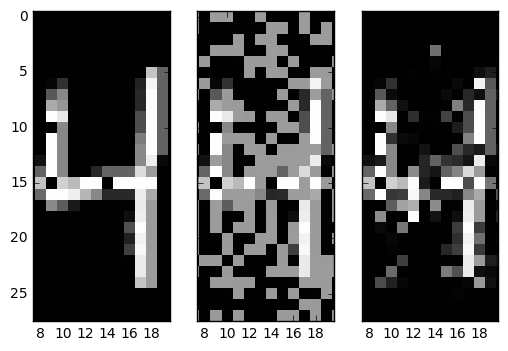

In [5]:
# ---------------------------------------------
# 3. VISUALIZATION OF A RANDOM IMAGE
# ---------------------------------------------
print 'Visualizing ground truth example'
f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex='col', sharey='row')
V = [ax1, ax2, ax3]
# Reshape the array into 28 x 28 array (2-dimensional array)
idx_ran = np.random.randint(0,Xmiss.shape[1])

pixels = Xtrue[:,idx_ran]
pixels = np.array(pixels, dtype='uint8')
pixels = pixels.reshape((28, 28))
# Plot
V[0].imshow(pixels, cmap='gray',interpolation='none')

print 'Visualizing a single example with missing...'
pixels = Xmiss[:,idx_ran]
pixels = np.array(pixels, dtype='uint8')
pixels = pixels.reshape((28, 28))
V[1].imshow(pixels, cmap='gray',interpolation='none')

print 'Visualizing a single example without missing...'
pixels = Xcompl[:,idx_ran]
pixels = np.array(pixels, dtype='uint8')
pixels = pixels.reshape((28, 28))
# Plot
V[2].imshow(pixels, cmap='gray',interpolation='none')
plt.ion() # interactive mode for plotting (script continues)
plt.show()
